<a href="https://colab.research.google.com/github/ShubhamMaurya7/Netflix-Content-Recommendation-System/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls '/content/drive/MyDrive/netflix_titles.csv'

/content/drive/MyDrive/netflix_titles.csv


In [4]:
df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.shape

(8807, 12)

In [8]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [9]:
df.dropna(subset=['title'], inplace=True)

df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

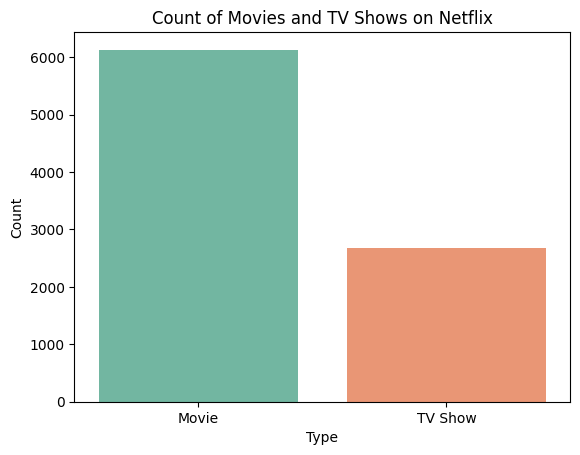

In [10]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

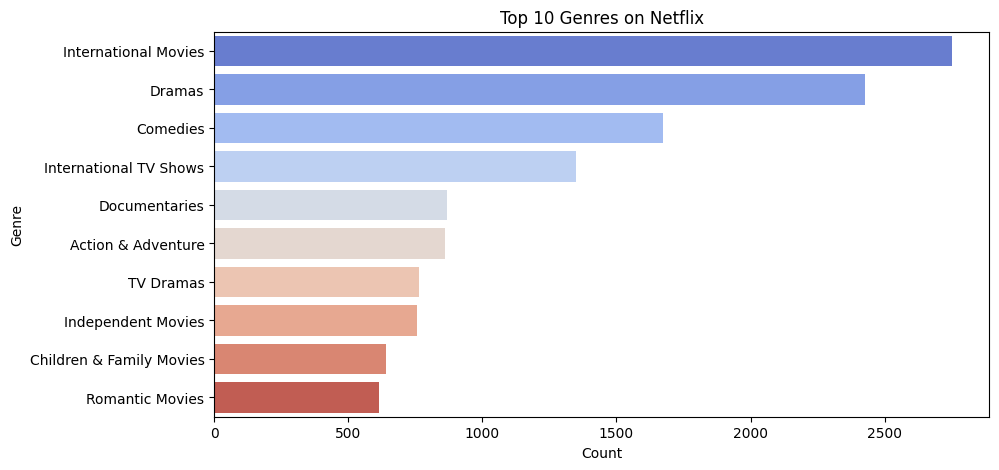

In [11]:
genres = df['listed_in'].str.split(', ', expand=True).stack()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

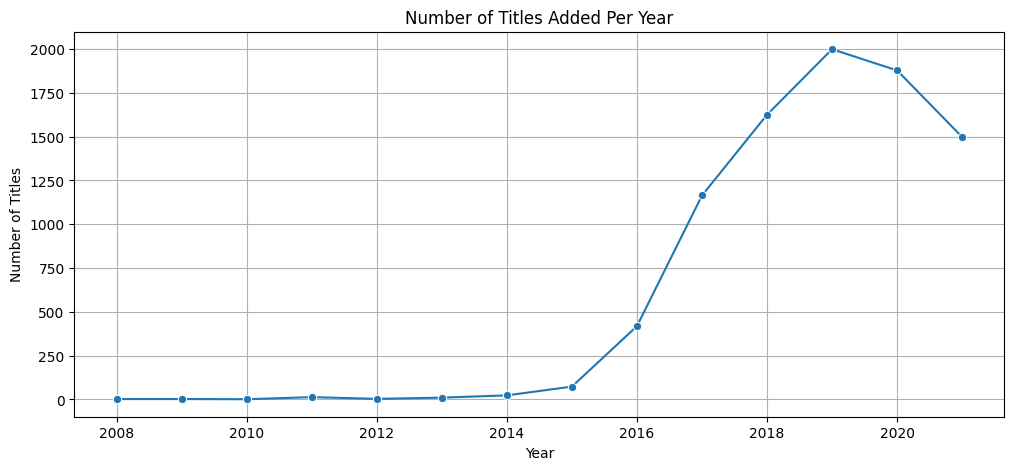

In [12]:
df['year_added'] = df['date_added'].dt.year
yearly_count = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=yearly_count.index, y=yearly_count.values, marker='o')
plt.title('Number of Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

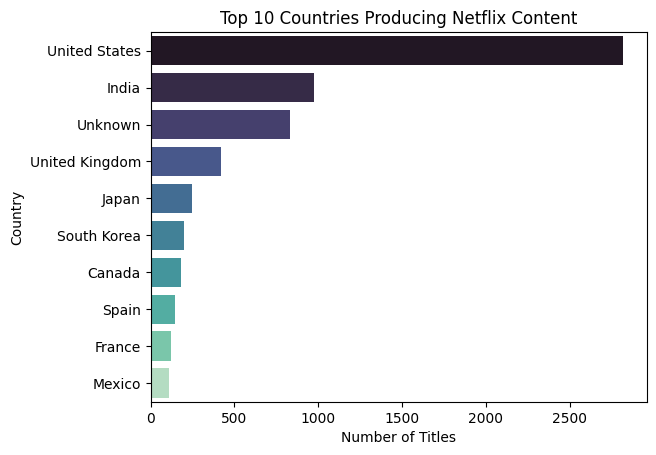

In [13]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

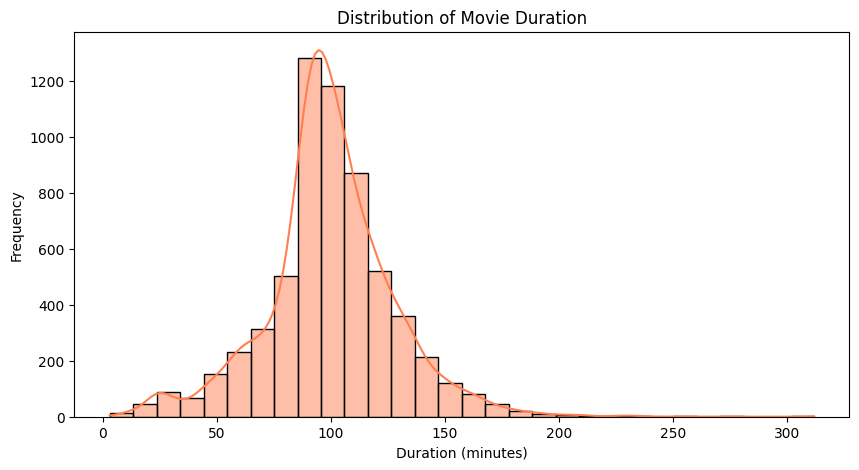

In [14]:
# Filter only movies
movies_df = df[df['type'] == 'Movie']
movies_df['minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(movies_df['minutes'].dropna(), bins=30, kde=True, color='coral')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

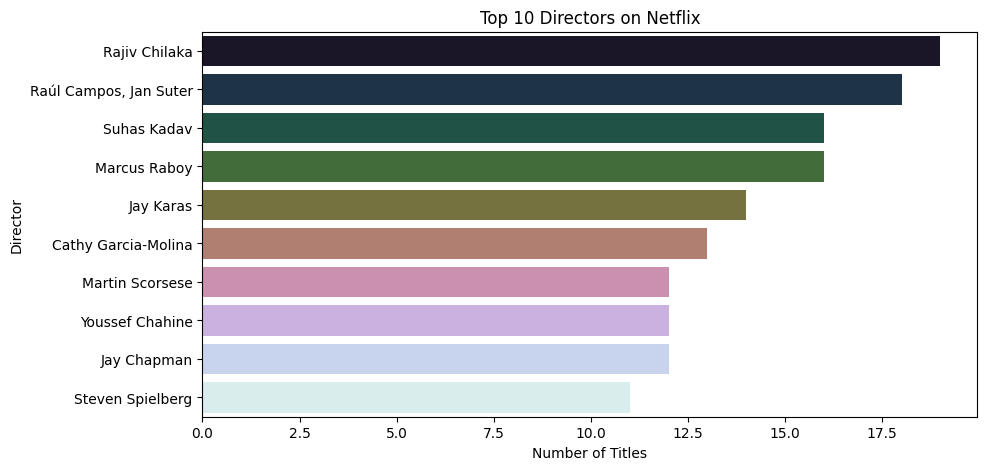

In [15]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

In [16]:
# Fill 'director', 'cast', 'country' with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Fill missing ratings with 'Not Rated'
df['rating'].fillna('Not Rated', inplace=True)

# Convert date_added to datetime format and extract year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill any remaining missing date_added with a placeholder (optional)
df['date_added'].fillna(pd.to_datetime('2000-01-01'), inplace=True)

# Extract year_added column for time analysis
df['year_added'] = df['date_added'].dt.year

# Fill duration missing values (typically very few)
df['duration'].fillna('Unknown', inplace=True)


In [17]:
# Check for duplicates
df.duplicated().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

In [18]:
df['title'] = df['title'].str.strip()
df['type'] = df['type'].str.strip()
df['country'] = df['country'].str.strip()

In [19]:
# Only for movies
df['minutes'] = df[df['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)

In [20]:
# Re-check nulls
df.isnull().sum()

# Check updated info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int32         
 13  minutes       6128 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(10)
memory usage: 929.0+ KB

In [21]:
# Only selecting useful columns
df_model = df[['type', 'release_year', 'duration', 'rating', 'country']].copy()

# Convert target to numeric
df_model['type'] = df_model['type'].map({'Movie': 0, 'TV Show': 1})

# Extract numeric duration
df_model['duration_num'] = df_model['duration'].str.extract('(\d+)').astype(float)
df_model['duration_num'].fillna(0, inplace=True)

# Fill missing categorical columns
df_model['country'].fillna('Unknown', inplace=True)
df_model['rating'].fillna('Not Rated', inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder

le_country = LabelEncoder()
le_rating = LabelEncoder()

df_model['country_enc'] = le_country.fit_transform(df_model['country'])
df_model['rating_enc'] = le_rating.fit_transform(df_model['rating'])

# Final dataset
X = df_model[['release_year', 'duration_num', 'country_enc', 'rating_enc']]
y = df_model['type']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       1.00      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



In [24]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [25]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load model and encoders (save them first using pickle)
model = pickle.load(open('netflix_model.pkl', 'rb'))
le_country = pickle.load(open('le_country.pkl', 'rb'))
le_rating = pickle.load(open('le_rating.pkl', 'rb'))

st.title("Netflix Content Type Predictor 🎬")

# User inputs
release_year = st.number_input("Release Year", min_value=1900, max_value=2025, step=1)
duration = st.number_input("Duration (minutes or seasons)", min_value=1, max_value=500)
country = st.text_input("Country", value="United States")
rating = st.text_input("Rating (e.g., TV-MA, PG)", value="TV-MA")

if st.button("Predict Type"):
    # Encode inputs
    try:
        country_enc = le_country.transform([country])[0]
    except:
        country_enc = 0  # default or unknown

    try:
        rating_enc = le_rating.transform([rating])[0]
    except:
        rating_enc = 0

    # Prepare input
    input_data = np.array([[release_year, duration, country_enc, rating_enc]])

    prediction = model.predict(input_data)[0]
    result = "TV Show" if prediction == 1 else "Movie"

    st.success(f"The content is likely a **{result}** 🎉")

FileNotFoundError: [Errno 2] No such file or directory: 'netflix_model.pkl'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle

# Select and clean relevant columns
df_model = df[['type', 'release_year', 'duration', 'rating', 'country']].copy()

# Encode target variable
df_model['type'] = df_model['type'].map({'Movie': 0, 'TV Show': 1})

# Handle missing data
df_model['duration'] = df_model['duration'].fillna('0')
df_model['duration_num'] = df_model['duration'].str.extract('(\d+)').astype(float)
df_model['duration_num'].fillna(0, inplace=True)
df_model['country'].fillna('Unknown', inplace=True)
df_model['rating'].fillna('Not Rated', inplace=True)

# Encode categorical features
le_country = LabelEncoder()
le_rating = LabelEncoder()

df_model['country_enc'] = le_country.fit_transform(df_model['country'])
df_model['rating_enc'] = le_rating.fit_transform(df_model['rating'])

# Final features and labels
X = df_model[['release_year', 'duration_num', 'country_enc', 'rating_enc']]
y = df_model['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
import pickle

pickle.dump(model, open('/content/netflix_model.pkl', 'wb'))
pickle.dump(le_country, open('/content/le_country.pkl', 'wb'))
pickle.dump(le_rating, open('/content/le_rating.pkl', 'wb'))

In [ ]:
from google.colab import files

files.download('/content/netflix_model.pkl')
files.download('/content/le_country.pkl')
files.download('/content/le_rating.pkl')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# # Load Netflix dataset
# df = pd.read_csv('netflix_titles.csv')

# Keep only necessary columns
df = df[['title', 'listed_in', 'description']].dropna()

# Combine features
df['combined'] = df['listed_in'] + ' ' + df['description']

# Remove duplicates
df.drop_duplicates(subset='title', inplace=True)

# Reset index
df = df.reset_index(drop=True)

In [ ]:
# Convert text into vectors using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Create mapping of title to index
indices = pd.Series(df.index, index=df['title'].str.lower())

def recommend(title, cosine_sim=cosine_sim):
    title = title.lower()
    if title not in indices:
        return ["Title not found."]

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    show_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[show_indices].tolist()

In [ ]:
recommend("Stranger Things")

In [ ]:
import pickle

pickle.dump(df, open("netflix_df.pkl", "wb"))
pickle.dump(cosine_sim, open("cosine_sim.pkl", "wb"))

In [ ]:
from google.colab import files

files.download('netflix_df.pkl')
files.download('cosine_sim.pkl')

In [ ]:
import zipfile

# Zip cosine similarity matrix
with zipfile.ZipFile('cosine_sim.zip', 'w') as zf:
    zf.write('cosine_sim.pkl')

# Download the zip instead
from google.colab import files
files.download('cosine_sim.zip')